# Gravidade de um corpo extendido

## Conteúdo

### Física da Terra

#### Resumo teórico
Aproximação do cálculo da gravidade de um corpo extendido


### Teoria da gravidade de um corpo extendido

Neste exercício, estamos interessado na aproximação da gravidade de um corpo extendido. O potencial gravitacional num ponto $P$ externo é dada pela equação

\begin{equation}
U_g = -G\, \int_x \int_y \int_z \frac{\rho(x,y,z)}{r(x,y,z)}\,dx\,dy\,dz\,,
\end{equation}

onde $G$ é a constante gravitacional, $\rho(x,y,z)$ é a densidade na posição $(x,y,z)$, e $r(x,y,z)$ é a distância entre $(x,y,z)$ e o ponto de observação $P$.

Para resolver numericamente a integral, discretizamos o domínio espacial em pontos do grid uniformemente espaçados $(x_i, y_i, z_i)$, separados por uma pequena distância $h$. Em seguida, obtemos uma aproximação de $U_g$ somando todos os pontos do grid,

\begin{equation}
U_g \approx -G\,\sum_i \frac{\rho(x_i,y_i,z_i)}{r(x_i,y_i,z_i)}\,V\,,
\end{equation}

onde o pequeno volume $V$ é dado por $V=h^3\approx dx\,dy\,dz$. O produto $\rho(x_i, y_i, z_i) V$ é igual à massa $m_i$ contida no pequeno volume $V$. Renomeando $r_i=r(x_i,y_i,z_i)$, podemos reescrever a equação acima como

\begin{equation}
U_g \approx -G\,\sum_i \frac{m_i}{r_i}\,,
\end{equation}

Uma aproximação que faremos ao longo deste exercício é que a Terra está contida em uma pequena caixa retangular. Embora isso obviamente não seja realista, simplifica muito os cálculos, ao mesmo tempo que ilustra os princípios básicos.

### 0. Importando pacotes Python packages e definindo a constante gravitacional

Iniciamos importando pacotes Python essenciais e definimos a constante gravitacional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

print('G =',G)

G = 6.6743e-11


### 1. Domínio computational e distribuição de densidade

**Como uma primeira etapa, configuramos o domínio computacional e definimos alguma distribuição de densidade.** Por conveniência, nos limitamos a uma distribuição de densidade 2D, o que significa que ignoramos a extensão espacial do corpo na direção $y$.

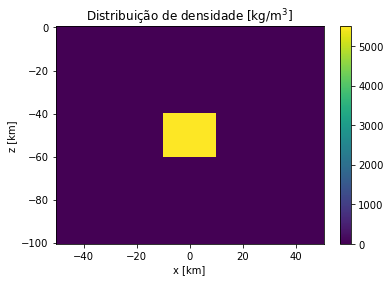

In [2]:
# Dimensão do domínio computacional[m].
x_min=-50.0e3       # x_minimo = -50 km
x_max=50.0e3        # x_maximo =  50 km
z_min=-100.0e3      # x_minimo = -100 km
z_max=0.0           # z_maximo =  0 km 

# Espaçamento do Grid [m] e o volume das células.
h=1.0e3             # espaçamento do grid h=1 km.
V=h**3              # volume  da célula   v=h^3.  

nx=np.int_((x_max-x_min)/h)   # número de espaçamentos em x.
nz=np.int_((z_max-z_min)/h)   # número de espaçamentos em z.

# Eixos das Coordenadas.
x=np.linspace(x_min,x_max,nx)   # eixo x.
z=np.linspace(z_min,z_max,nz)   # eixo z.

xv,zv=np.meshgrid(x,z,indexing='ij') # grid em x e z

# Definindo algumas distribuição de densidade.
rho=np.zeros(np.shape(xv))
rho[40:60,40:60]=5500.0

# Plot da distribuiçao de densidade.
#plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='Greys',shading='auto')
plt.pcolormesh(xv/1000.0,zv/1000.0,rho,cmap='viridis',shading='auto')
#plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='plasma',shading='auto')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'Distribuição de densidade [kg$/$m$^3$]')
#plt.grid()

plt.colorbar()
plt.show()

### 2. Potencial Gravitacional

**Com base na configuração acima, podemos calcular o potencial gravitacional em alguns pontos de observação.** Para isso, escolhemos inicialmente uma linha de pontos próximos localizados $10$ m acima da superfície.


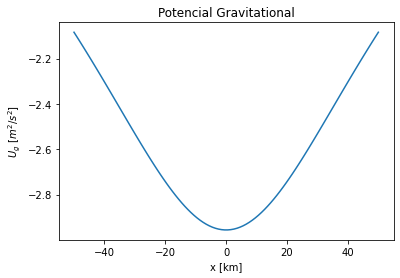

In [3]:
# Define ponto de observações.
z_above = 10.0
x_obs=x
z_obs=z_above*np.ones(nx)

# Inicializa potencial gravitacional.
U=np.zeros(len(x_obs))

# Loop sobre todos os pontos de observações.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U[k]=-G*V*np.sum(rho/r)
            
# Plot do potencial gravitacional.
plt.plot(x_obs/1000.0,U)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('Potencial Gravitational')
plt.show()

### 3. Distribuição alternativa de densidade


**As linhas de código anteriores são muito flexíveis e podem ser usadas para estudar o potencial gravitacional de outras distribuições de densidade.** Como exemplo, consideramos uma versão mais densa do quadrado do item 2., mas com uma inclusão de um corpo de baixa densidade .

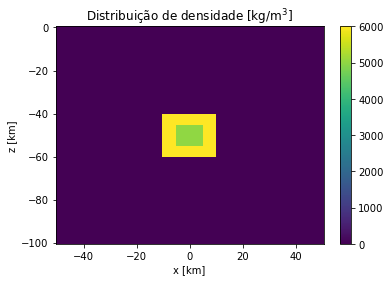

In [4]:
# Define distribuição de densidade alternativa.
rho_alt=np.zeros(np.shape(xv))
rho_alt[40:60,40:60]=6000.0   # rho[40:60,40:60]=5500.0 <== densidades originais
rho_alt[45:55,45:55]=5000.0   # rho[45:55,45:55]=5500.0 <== densidades originais

# Plot distribuição de densidade.
# plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='Greys',shading='auto')
plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='viridis',shading='auto')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'Distribuição de densidade [kg$/$m$^3$]')
plt.colorbar()
plt.show()

# Inicializa o potencial gravitacional.
U_alt=np.zeros(len(x_obs))

# Loop sobre todos os pontos de observações.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_alt[k]=-G*V*np.sum(rho_alt/r)

### 4. Comparando os Potenciais das Duas Distribuições
Agora podemos comparar os potenciais gravimétricos das duas distribuições, observe que para a primeira distribuição a variável que represnta o potencial gravimétrico é igual a $U$, enquanto que para a segunda distribuição alternativa a variável que representa esta distribuição é denotada por $U_{alt}$.


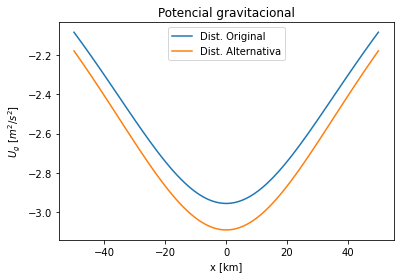

In [5]:
# Plot potencial gravitacional.
plt.plot(x_obs/1000.0,U,label='Dist. Original')       # Potencial da disitribuição original.
plt.plot(x_obs/1000.0,U_alt,label='Dist. Alternativa')   # Potencial da disitribuição alternativa.
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('Potencial gravitacional')
plt.legend()
plt.show()

### 5. Exercícios Resolvidos

1) No item 3, modifique a densidade da inclusão de modo que o potencial de gravidade resultante se assemelhe ao potencial do ponto 2 o mais próximo possível.

Para isso, plote a diferença entre as variáveis *U* e *U_alt*, normalizadas pelo valor máximo de *U*. O que seu resultado implica para nossa capacidade de distinguir diferentes tipos de distribuições de densidade na Terra?

2) Modifique a distribuição de densidade 2D a fim de modelar o potencial de gravidade para as seguintes configurações geológicas: (a) uma falha normal, (b) uma falha reversa, (c) um anticlinal, (d) um sinclinal, e (e) um vazio dentro de um meio homogêneo.

3) Calcule o potencial gravitacional em um grid 2D de pontos de observação acima da superfície ($ z> 0 $) e plote a superfície equipotencial usando a função *plt.contour*.


#### 5.1 Solução:

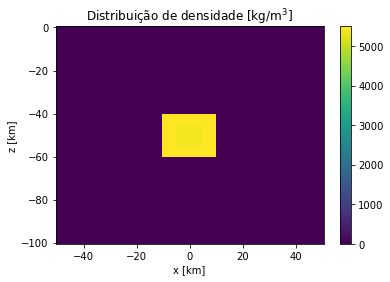

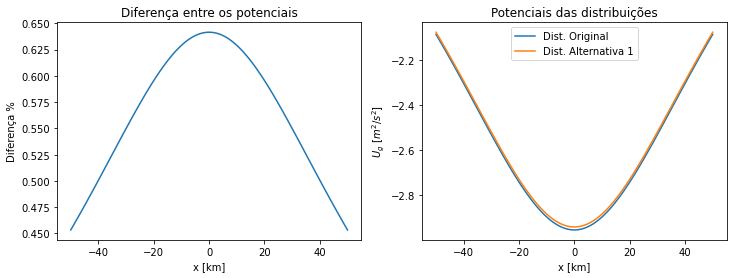

array([-50000.        , -48989.8989899 , -47979.7979798 , -46969.6969697 ,
       -45959.5959596 , -44949.49494949, -43939.39393939, -42929.29292929,
       -41919.19191919, -40909.09090909, -39898.98989899, -38888.88888889,
       -37878.78787879, -36868.68686869, -35858.58585859, -34848.48484848,
       -33838.38383838, -32828.28282828, -31818.18181818, -30808.08080808,
       -29797.97979798, -28787.87878788, -27777.77777778, -26767.67676768,
       -25757.57575758, -24747.47474747, -23737.37373737, -22727.27272727,
       -21717.17171717, -20707.07070707, -19696.96969697, -18686.86868687,
       -17676.76767677, -16666.66666667, -15656.56565657, -14646.46464646,
       -13636.36363636, -12626.26262626, -11616.16161616, -10606.06060606,
        -9595.95959596,  -8585.85858586,  -7575.75757576,  -6565.65656566,
        -5555.55555556,  -4545.45454545,  -3535.35353535,  -2525.25252525,
        -1515.15151515,   -505.05050505,    505.05050505,   1515.15151515,
         2525.25252525,  

In [47]:
# Define distribuição de densidade alternativa.
rho_alt1=np.zeros(np.shape(xv))
rho_alt1[40:60,40:60]=5500.0           # rho[40:60,40:60]=5500.0 <== densidades originais
rho_alt1[45:55,45:55]=5400.0           # rho[45:55,45:55]=5500.0 <== densidades originais

# Plot distribuição de densidade.
# plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='Greys',shading='auto')
plt.pcolor(xv/1000.0,zv/1000.0,rho_alt1,cmap='viridis',shading='auto')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'Distribuição de densidade [kg$/$m$^3$]')
plt.colorbar()
plt.show()

# Inicializa o potencial gravitacional.
U_alt1=np.zeros(len(x_obs))
z_above = 10.0
x_obs=x
z_obs=z_above*np.ones(nx)

# Loop sobre todos os pontos de observações.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_alt1[k]=-G*V*np.sum(rho_alt1/r)


Dif_U= np.abs((U - U_alt1)/np.max(U))*100        # diferenca entre os dois potenciais

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(x_obs/1000.0,Dif_U)         # Plot da diferenca anomalia.
ax1.set_xlabel('x [km]')
ax1.set_ylabel(r'Diferença %')
ax1.set_title('Diferença entre os potenciais')

ax2.plot(x_obs/1000.0,U,label='Dist. Original')             # Potencial da disitribuição original.
ax2.set_xlabel('x [km]')
ax2.plot(x_obs/1000.0,U_alt1,'-',label='Dist. Alternativa 1')   # Potencial da disitribuição alternativa.
ax2.set_ylabel(r'$U_g$ [$m^2$/$s^2$]')
ax2.set_title('Potenciais das distribuições')
plt.legend()
plt.show()

x_obs
#np.max(U)

#### 5.2 Solução:

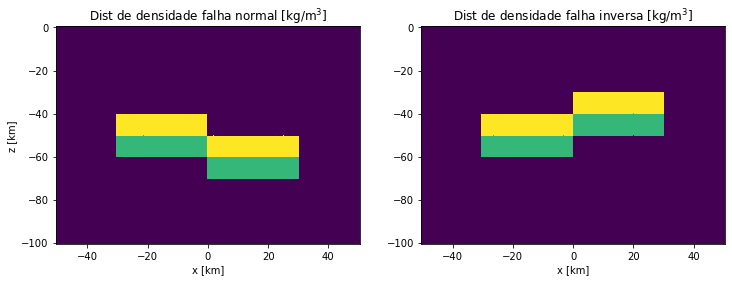

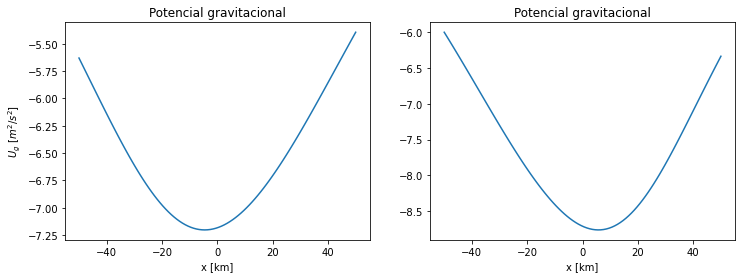

In [41]:
#============  Falha normal   ========================
rho_n=np.zeros(np.shape(xv))
rho_n[20:50,40:50]=4000.0
rho_n[20:50,50:60]=6000.0
rho_n[50:80,30:40]=4000.0
rho_n[50:80,40:50]=6000.0
#=====================================================

#============ Falha inversa   ========================
rho_i=np.zeros(np.shape(xv))
rho_i[20:50,40:50]=4000.0
rho_i[20:50,50:60]=6000.0
rho_i[50:80,50:60]=4000.0
rho_i[50:80,60:70]=6000.0
#=====================================================

# ============= Plot distribuição de densidade.=======

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.pcolor(xv/1000.0,zv/1000.0,rho_n,cmap='viridis',shading='auto')
ax1.set_xlabel('x [km]')
ax1.set_ylabel('z [km]')
ax1.set_title(r'Dist de densidade falha normal [kg$/$m$^3$]')
#plt.show()

ax2.pcolor(xv/1000.0,zv/1000.0,rho_i,cmap='viridis',shading='auto')
ax2.set_xlabel('x [km]')
ax2.set_title(r'Dist de densidade falha inversa [kg$/$m$^3$]')
#plt.colorbar()
#fig.colorbar(cax=ax2)
#plt.show()

# =====================================================

# ============= Calculo do potencial  =================

# Inicializa o potencial gravitacional.
U_n=np.zeros(len(x_obs))
U_i=np.zeros(len(x_obs))
z_above = 10.0
x_obs=x
z_obs=z_above*np.ones(nx)

# Loop sobre todos os pontos de observações.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_n[k]=-G*V*np.sum(rho_n/r)
    U_i[k]=-G*V*np.sum(rho_i/r)

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax3.plot(x_obs/1000.0,U_n)         # Plot da diferenca anomalia.
ax3.set_xlabel('x [km]')
ax3.set_ylabel(r'$U_g$ [$m^2$/$s^2$]')
ax3.set_title('Potencial gravitacional')

ax4.plot(x_obs/1000.0,U_i)         # Plot da diferenca anomalia.
ax4.set_xlabel('x [km]')
ax4.set_title('Potencial gravitacional')

#plt.plot(x_obs/1000.0,U_n,label='Dist. falha normal')       # Potencial da distribuição falha normal.
#plt.xlabel('x [km]')
#plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
#plt.title('Potencial gravitacional')
plt.show()

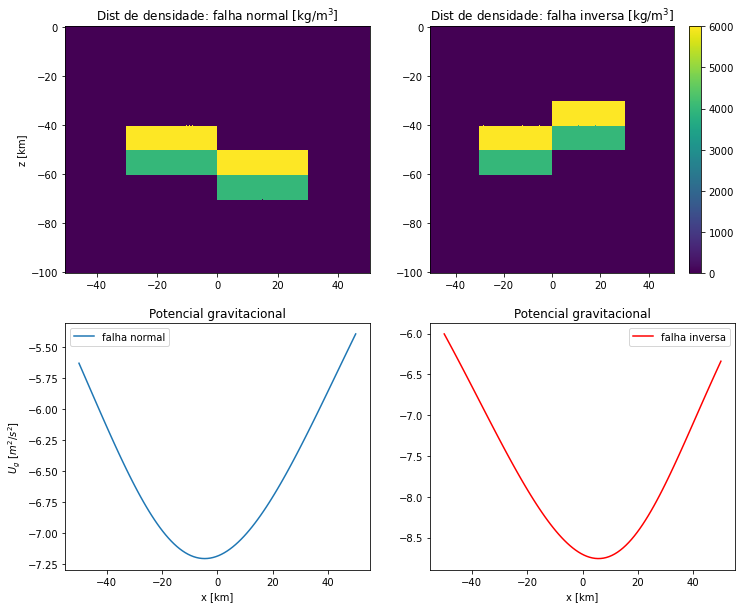

In [8]:
#============  Falha normal   ========================
rho_n=np.zeros(np.shape(xv))
rho_n[20:50,40:50]=4000.0
rho_n[20:50,50:60]=6000.0
rho_n[50:80,30:40]=4000.0
rho_n[50:80,40:50]=6000.0
#=====================================================

#============ Falha inversa   ========================
rho_i=np.zeros(np.shape(xv))
#rho_i[:,:]=10000.0
rho_i[20:50,40:50]=4000.0
rho_i[20:50,50:60]=6000.0
rho_i[50:80,50:60]=4000.0
rho_i[50:80,60:70]=6000.0
#=====================================================


# ============= Calculo do potencial  =================

# Inicializa o potencial gravitacional.
U_n=np.zeros(len(x_obs))
U_i=np.zeros(len(x_obs))
z_above = 10.0              # não pode ser igual a zero
x_obs=x
z_obs=z_above*np.ones(nx)

# Loop sobre todos os pontos de observações.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_n[k]=-G*V*np.sum(rho_n/r)
    U_i[k]=-G*V*np.sum(rho_i/r)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

ax1.pcolor(xv/1000.0,zv/1000.0,rho_n,cmap='viridis',shading='auto')
ax1.set_ylabel('z [km]')
ax1.set_title(r'Dist de densidade: falha normal [kg$/$m$^3$]')

c=ax2.pcolor(xv/1000.0,zv/1000.0,rho_i,cmap='viridis',shading='auto')
ax2.set_title(r'Dist de densidade: falha inversa [kg$/$m$^3$]')

ax3.plot(x_obs/1000.0,U_n,label='falha normal')         # Plot da diferenca anomalia.
ax3.set_xlabel('x [km]')
ax3.set_ylabel(r'$U_g$ [$m^2$/$s^2$]')
ax3.set_title('Potencial gravitacional')
ax3.legend()

ax4.plot(x_obs/1000.0,U_i,'r',label='falha inversa')         # Plot da diferenca anomalia.
ax4.set_xlabel('x [km]')
ax4.set_title('Potencial gravitacional')
ax4.legend()

cb = plt.colorbar(c, ax=ax2)
plt.show()

#### 5.3 Solução:

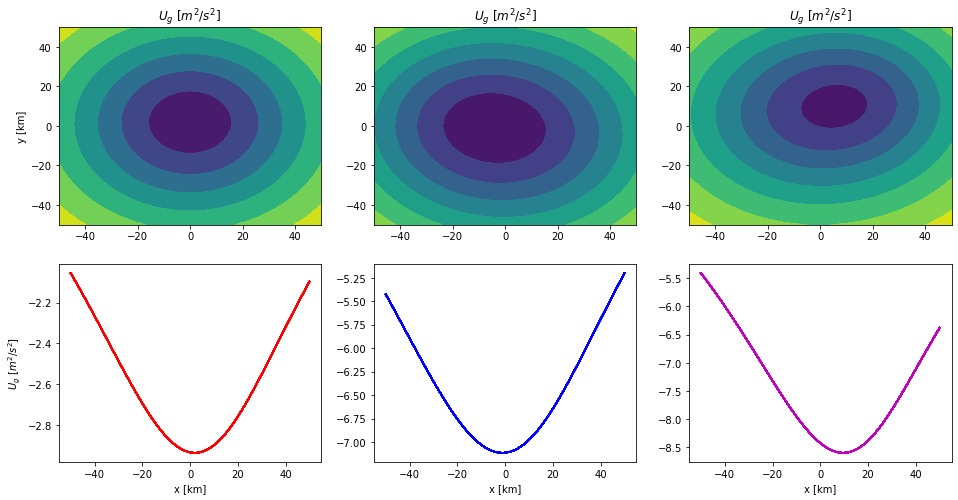

In [52]:
# Dimensão do domínio computacional[m].
x_min=-50.0e3       # x_minimo = -50 km
x_max=50.0e3        # x_maximo =  50 km
z_min=-100.0e3      # x_minimo = -100 km
z_max=0.0           # z_maximo =  0 km

y_min=-50.0e3       # y_minimo = -50 km
y_max= 50.0e3       # y_maximo =  50 km

# Espaçamento do Grid [m] e o volume das células.
h=1.0e3             # espaçamento do grid h=1 km.
V=h**3              # volume  da célula   v=h^3.  

nx=np.int_((x_max-x_min)/h)   # número de espaçamentos em x.
nz=np.int_((z_max-z_min)/h)   # número de espaçamentos em z.
ny=np.int_((y_max-y_min)/h)   # número de espaçamentos em y.

# Eixos das Coordenadas.
x=np.linspace(x_min,x_max,nx)   # eixo x.
z=np.linspace(z_min,z_max,nz)   # eixo z.
y=np.linspace(y_min,y_max,ny)   # eixo y.


xv,zv=np.meshgrid(x,z,indexing='ij') # grid em x e z

xv,yv=np.meshgrid(x,y,indexing='ij') # grid em x e y

rho_v=np.zeros(np.shape(xv))  #  inclusão modelo 01
rho_fn=np.zeros(np.shape(xv)) #  modelo falha normal 
rho_fi=np.zeros(np.shape(xv)) #  modelo falha inversa

#==============   Modelos   =========================
#====================================================
rho_v[40:60,40:60]=5500.0   #  inclusão modelo 01
#====================================================

rho_fn[20:50,40:50]=4000.0  #  modelo falha normal
rho_fn[20:50,50:60]=6000.0  #  modelo falha normal
rho_fn[50:80,30:40]=4000.0  #  modelo falha normal
rho_fn[50:80,40:50]=6000.0  #  modelo falha normal

#====================================================

rho_fi[20:50,40:50]=4000.0  #  modelo falha inversa
rho_fi[20:50,50:60]=6000.0  #  modelo falha inversa
rho_fi[50:80,50:60]=4000.0  #  modelo falha inversa
rho_fi[50:80,60:70]=6000.0  #  modelo falha inversa

#====================================================

z_above = 10.0
x_obs=xv
y_obs=yv
z_obs=z_above*np.ones(np.shape(xv))

U_v  = np.zeros(np.shape(xv))
U_fn = np.zeros(np.shape(xv))
U_fi = np.zeros(np.shape(xv))

for j in range(len(y_obs)):
    for k in range(len(x_obs)):
        r=np.sqrt((x_obs[j,k]-xv)**2 + (y_obs[j,k]-yv)**2 + (z_obs[j,k]-zv)**2)
        U_v[j,k]=-G*V*np.sum(rho_v/r)
        U_fn[j,k]=-G*V*np.sum(rho_fn/r)
        U_fi[j,k]=-G*V*np.sum(rho_fi/r)


fig, ((ax1, ax2 ,ax3),(ax4, ax5 ,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

ax1.contourf(xv/1000.0,yv/1000.0,U_v,cmap='viridis')
ax1.set_ylabel('y [km]')
ax1.set_title(r'$U_g$ [$m^2$/$s^2$]')

ax2.contourf(xv/1000.0,yv/1000.0,U_fn,cmap='viridis')
ax2.set_title(r'$U_g$ [$m^2$/$s^2$]')

ax3.contourf(xv/1000.0,yv/1000.0,U_fi,cmap='viridis')
ax3.set_title(r'$U_g$ [$m^2$/$s^2$]')

ax4.plot(x_obs/1000.0,U_v[50,:],'r')         # Plot 
ax4.set_xlabel('x [km]')
ax4.set_ylabel(r'$U_g$ [$m^2$/$s^2$]')

ax5.plot(x_obs/1000.0,U_fn[50,:],'b')         # Plot 
ax5.set_xlabel('x [km]')

ax6.plot(x_obs/1000.0,U_fi[50,:],'m')         # Plot 
ax6.set_xlabel('x [km]')

plt.show()